In [1]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/c-s-data/customer_segmentation_data.csv


### **EDA**

In [2]:
df=pd.read_csv("/kaggle/input/c-s-data/customer_segmentation_data.csv")
df.head()

,minutes_watched,CLV,region,channel
0,3197.0,205.42,2,4
1,63.0,149.99,0,1
2,605.0,119.00,2,2
3,20.0,240.00,2,4
4,245.0,184.36,1,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minutes_watched  3725 non-null   float64
 1   CLV              3834 non-null   float64
 2   region           3834 non-null   int64  
 3   channel          3834 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 119.9 KB


In [4]:
df.region.value_counts()
#2-rest of the world
#1-Western Europe
#0-Anglo-Saxon

region
2    2007
0    1366
1     461
Name: count, dtype: int64

In [5]:
df.describe()

,minutes_watched,CLV,region,channel
count,3725.000000,3834.000000,3834.000000,3834.000000
mean,1972.094497,118.383920,1.167188,3.870370
std,7401.693028,70.471274,0.923055,2.191972
min,0.000000,0.000000,0.000000,1.000000
25%,159.000000,62.580000,0.000000,2.000000
50%,512.000000,119.000000,2.000000,3.000000
75%,1521.000000,149.990000,2.000000,6.000000
max,288508.000000,626.400000,2.000000,8.000000


In [6]:
df.shape

(3834, 4)

In [7]:
#checking for missing values
df.isna().sum()

minutes_watched    109
CLV                  0
region               0
channel              0
dtype: int64

In [8]:
# minutes watched has some missing values
# filling the missing values with zeroes
df["minutes_watched"]=df["minutes_watched"].fillna(0)
df.isna().sum()

minutes_watched    0
CLV                0
region             0
channel            0
dtype: int64

<Axes: >

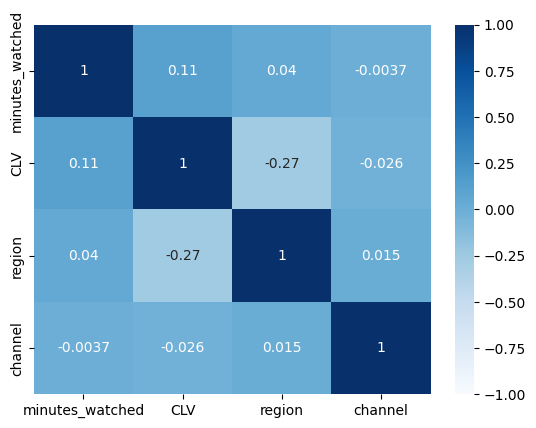

In [9]:
#finding correlations between the columns
df.corr(method="pearson")
sns.heatmap(df.corr(),annot=True,cmap="Blues",vmin=-1,vmax=1)

In [10]:
#creating dummy variables for columns: region, channel
df1=df.copy()
df1=pd.get_dummies(df,columns=["region","channel"])

In [11]:
df1.columns

Index(['minutes_watched', 'CLV', 'region_0', 'region_1', 'region_2',
       'channel_1', 'channel_2', 'channel_3', 'channel_4', 'channel_5',
       'channel_6', 'channel_7', 'channel_8'],
      dtype='object')

In [12]:
#adding the region column back
df1["region"]=df["region"]
df1=df1[["minutes_watched","CLV","region",'region_0', 'region_1', 'region_2',
       'channel_1', 'channel_2', 'channel_3', 'channel_4', 'channel_5',
       'channel_6', 'channel_7', 'channel_8']]
df1.head()

,minutes_watched,CLV,region,region_0,region_1,region_2,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8
0,3197.0,205.42,2,False,False,True,False,False,False,True,False,False,False,False
1,63.0,149.99,0,True,False,False,True,False,False,False,False,False,False,False
2,605.0,119.00,2,False,False,True,False,True,False,False,False,False,False,False
3,20.0,240.00,2,False,False,True,False,False,False,True,False,False,False,False
4,245.0,184.36,1,False,True,False,False,False,False,True,False,False,False,False


In [13]:
#renaming the columns
df1=df1.rename(columns={"channel_1":"Google","channel_2":"Facebook","channel_3":"Youtube",
               "channel_4":"LinkedIn","channel_5":"Twitter","channel_6":"Instagram",
               "channel_7":"Friend","channel_8":"Other","region_0":"USA CA UK AU","region_1":"Western Europe","region_2":"World"})
df1.head()

,minutes_watched,CLV,region,USA CA UK AU,Western Europe,World,Google,Facebook,Youtube,LinkedIn,Twitter,Instagram,Friend,Other
0,3197.0,205.42,2,False,False,True,False,False,False,True,False,False,False,False
1,63.0,149.99,0,True,False,False,True,False,False,False,False,False,False,False
2,605.0,119.00,2,False,False,True,False,True,False,False,False,False,False,False
3,20.0,240.00,2,False,False,True,False,False,False,True,False,False,False,False
4,245.0,184.36,1,False,True,False,False,False,False,True,False,False,False,False


Visualizations...

<Axes: >

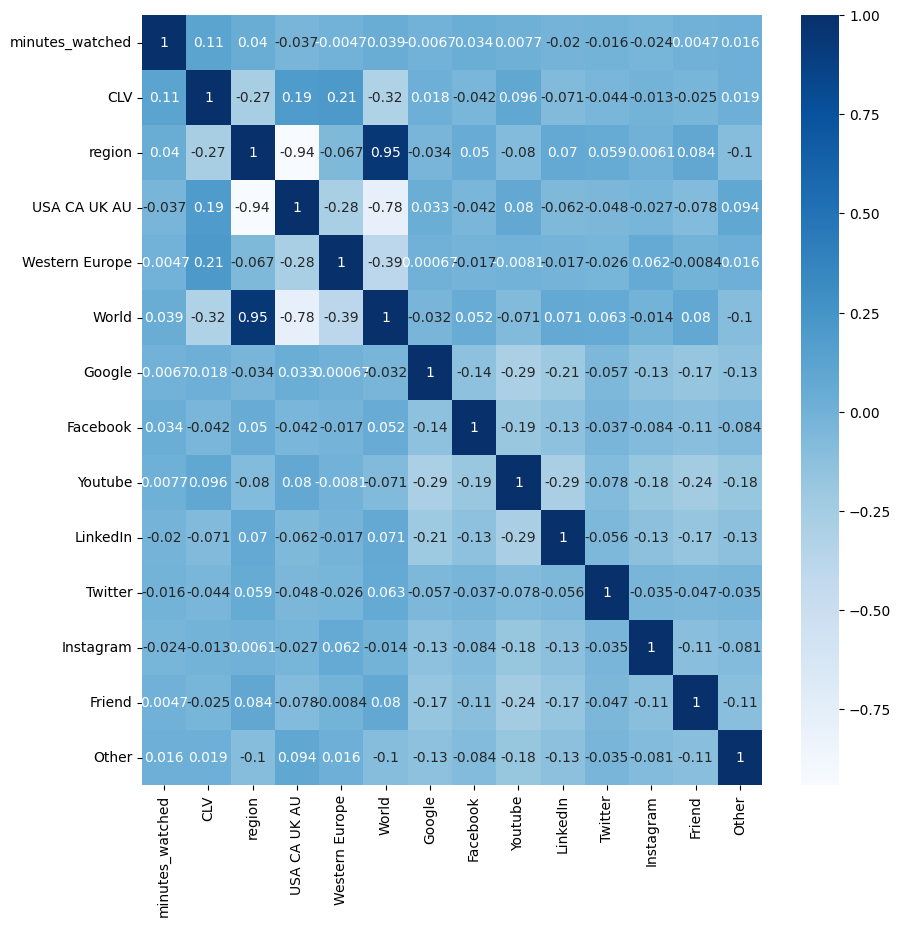

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True,cmap="Blues")

In [15]:
corr_matrix=df1.corr(method="pearson")
corr_matrix

,minutes_watched,CLV,region,USA CA UK AU,Western Europe,World,Google,Facebook,Youtube,LinkedIn,Twitter,Instagram,Friend,Other
minutes_watched,1.000000,0.114153,0.040100,-0.037041,-0.004707,0.038583,-0.006665,0.034347,0.007681,-0.020212,-0.015796,-0.024114,0.004660,0.015535
CLV,0.114153,1.000000,-0.273312,0.192527,0.208601,-0.320448,0.018108,-0.042313,0.095619,-0.070633,-0.044381,-0.012982,-0.025334,0.019438
region,0.040100,-0.273312,1.000000,-0.940855,-0.066970,0.945759,-0.034348,0.049888,-0.080044,0.070290,0.058583,0.006083,0.083908,-0.103089
USA CA UK AU,-0.037041,0.192527,-0.940855,1.000000,-0.275039,-0.779753,0.032869,-0.042251,0.079869,-0.061812,-0.047585,-0.026750,-0.077989,0.093788
Western Europe,-0.004707,0.208601,-0.066970,-0.275039,1.000000,-0.387478,0.000673,-0.017144,-0.008067,-0.017431,-0.026109,0.061514,-0.008435,0.016341
World,0.038583,-0.320448,0.945759,-0.779753,-0.387478,1.000000,-0.031955,0.051676,-0.071330,0.070621,0.062629,-0.014409,0.080273,-0.100570
Google,-0.006665,0.018108,-0.034348,0.032869,0.000673,-0.031955,1.000000,-0.135646,-0.291035,-0.208105,-0.057083,-0.131508,-0.173826,-0.131262
Facebook,0.034347,-0.042313,0.049888,-0.042251,-0.017144,0.051676,-0.135646,1.000000,-0.186093,-0.133066,-0.036500,-0.084089,-0.111147,-0.083931
Youtube,0.007681,0.095619,-0.080044,0.079869,-0.008067,-0.071330,-0.291035,-0.186093,1.000000,-0.285498,-0.078313,-0.180416,-0.238471,-0.180078
LinkedIn,-0.020212,-0.070633,0.070290,-0.061812,-0.017431,0.070621,-0.208105,-0.133066,-0.285498,1.000000,-0.055997,-0.129006,-0.170519,-0.128765


array([[<Axes: title={'center': 'minutes_watched'}>,
        <Axes: title={'center': 'CLV'}>],
       [<Axes: title={'center': 'region'}>, <Axes: >]], dtype=object)

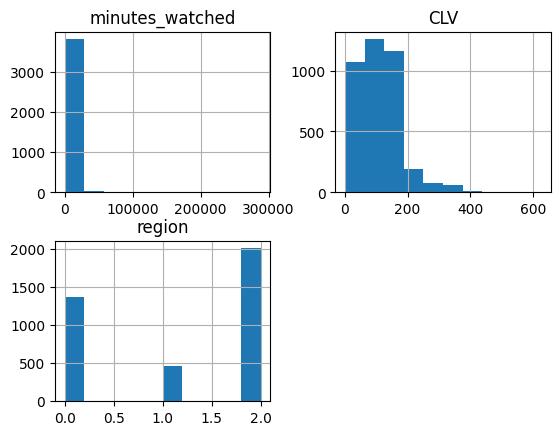

In [16]:
df1.hist()

Text(0, 0.5, 'customer lifetime value')

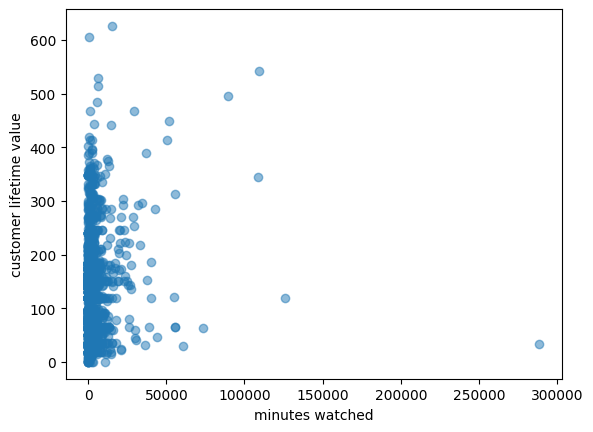

In [17]:
plt.scatter(df1["minutes_watched"],df1["CLV"],alpha=0.5)
plt.xlabel("minutes watched")
plt.ylabel("customer lifetime value")

By visualizing the minutes watched by the CLV, there’s little to be revealed. Apart from noticing a few outliers, we cannot conclude anything because the scale of the minutes watched vastly differs from that of the CLV. This leaves the chart looking cluttered. A possible solution would be to remove the outliers or rescale the minutes watched to hours watched.  

### **Model Implementation**

In [18]:
#scaling data
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df1_scaled=scaler.fit_transform(df1)

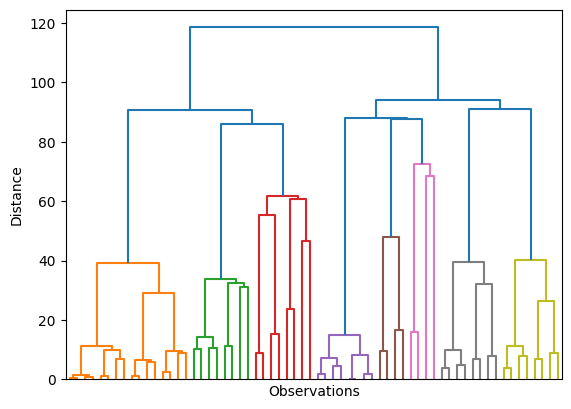

In [19]:
#hierarchical clustering using Ward's method

from scipy.cluster.hierarchy import dendrogram, linkage

clusters = linkage(df1_scaled, 
            method='ward')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(clusters, truncate_mode="level",p=5,show_leaf_counts=False,no_labels=True)
plt.show()

> The results of the algorithm point to eight separate clusters.

In [20]:
#kmeans

from sklearn.cluster import KMeans

inertia=[]

for i in range(1,11) :
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state = 42,n_init=1)
    kmeans.fit(df1_scaled)
    inertia.append(kmeans.inertia_)

inertia

[53675.999999999985,
 49464.21013305239,
 40004.97651362491,
 36896.442416451086,
 33684.83392858306,
 30792.12924932376,
 28757.63235461429,
 22653.658346423457,
 19616.93445928942,
 17755.258233834567]

Text(0, 0.5, 'Inertia')

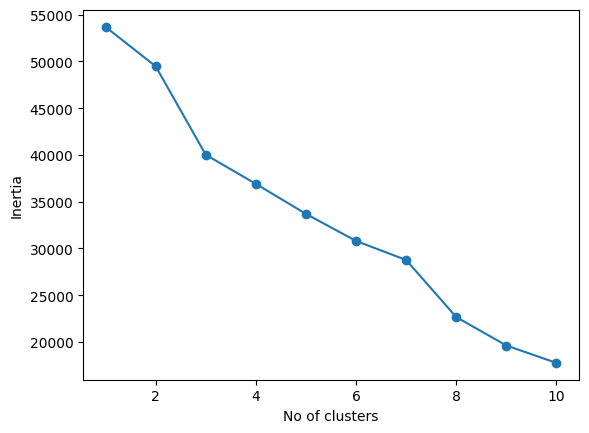

In [21]:
#elbow method to find the right number of clusters
plt.plot(range(1,11),inertia,marker='o')
plt.xlabel("No of clusters")
plt.ylabel('Inertia')

> Using elbow method, we observe that the results of the k-means algorithm point to two, four, or nine different clusters. These results differ from the eight clusters found by the hierarchical clustering with the elbow method.

We are going to opt for hierarchical clustering results and apply them in the k-means. Why?

Different methodologies: Hierarchical clustering builds a tree (or dendrogram) of clusters by successively splitting or merging them. The decision to split or merge can be based on various algorithms and criteria. On the other hand, k-means tries to find a predetermined number of clusters (k) that minimizes the within-cluster variance.

Initial setup sensitivity: K-means is highly sensitive to initial starting conditions—i.e., the initial placement of the centroid of each cluster. Different runs give different results. Hierarchical clustering is deterministic and will always provide the same result with the same data.

Cluster shape: K-means works best with spherical and evenly sized clusters. It might not do a good job if the clusters have irregular shapes, varying sizes, or densities. Hierarchical clustering does not have these assumptions. 


> Finally, we opt for hierarchical clustering results because it can determine the number of clusters for you, whereas k-means doesn’t, and it’s up to us to choose them with such techniques as the elbow method.

But in cases where we have too many data points, we can no longer rely on hierarchical clustering because it’s too inefficient.

The ideal number of clusters heavily depends on the data, features used, distance measured, and the specific clustering algorithm. Hierarchical and k-means clustering are different techniques that may produce different results.

In [22]:
#kmeans using the result of hierarchical 

from sklearn.cluster import KMeans

model=KMeans(n_clusters=8, n_init=1,random_state=42,init="k-means++")
model.fit(df1_scaled)

KMeans(n_init=1, random_state=42)

In [23]:
labels=model.labels_
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

### **Model Evaluation & Result**

In [24]:
#summary table
df2=df1.copy()
#creating a column, Clusters, that contains the cluster labels , later to be used for aggregation
df2["Clusters"]=labels

df2.head()

,minutes_watched,CLV,region,USA CA UK AU,Western Europe,World,Google,Facebook,Youtube,LinkedIn,Twitter,Instagram,Friend,Other,Clusters
0,3197.0,205.42,2,False,False,True,False,False,False,True,False,False,False,False,1
1,63.0,149.99,0,True,False,False,True,False,False,False,False,False,False,False,4
2,605.0,119.00,2,False,False,True,False,True,False,False,False,False,False,False,7
3,20.0,240.00,2,False,False,True,False,False,False,True,False,False,False,False,1
4,245.0,184.36,1,False,True,False,False,False,False,True,False,False,False,False,5


In [25]:
df2.columns

Index(['minutes_watched', 'CLV', 'region', 'USA CA UK AU', 'Western Europe',
       'World', 'Google', 'Facebook', 'Youtube', 'LinkedIn', 'Twitter',
       'Instagram', 'Friend', 'Other', 'Clusters'],
      dtype='object')

In [26]:
#performing aggregation, mean over all columns except N_obs, on which count is applied
df2_cluster_analysis=df2.groupby(["Clusters"]).mean()
df2_cluster_analysis

,minutes_watched,CLV,region,USA CA UK AU,Western Europe,World,Google,Facebook,Youtube,LinkedIn,Twitter,Instagram,Friend,Other
Clusters,,,,,,,,,,,,,,
0,1299.332180,115.180277,1.186851,0.311419,0.190311,0.498270,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000
1,1801.265985,91.118312,2.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000
2,2018.969340,109.117382,1.419811,0.290094,0.000000,0.709906,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000
3,2326.887114,103.938839,2.000000,0.000000,0.000000,1.000000,0.349308,0.0,0.544196,0.000000,0.0,0.0,0.000000,0.106496
4,1539.152607,136.329469,0.000000,1.000000,0.000000,0.000000,0.248341,0.0,0.432227,0.179147,0.0,0.0,0.000000,0.140284
5,1874.747312,157.922581,1.000000,0.000000,1.000000,0.000000,0.217742,0.0,0.341398,0.188172,0.0,0.0,0.145161,0.107527
6,985.327586,93.151552,1.603448,0.172414,0.051724,0.775862,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.000000,0.000000
7,2767.643791,108.260359,1.323529,0.287582,0.101307,0.611111,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000


In [27]:
df2_cluster_analysis["N_obs"]=df2[["Clusters","region"]].groupby(["Clusters"]).count()
df2_cluster_analysis

,minutes_watched,CLV,region,USA CA UK AU,Western Europe,World,Google,Facebook,Youtube,LinkedIn,Twitter,Instagram,Friend,Other,N_obs
Clusters,,,,,,,,,,,,,,,
0,1299.332180,115.180277,1.186851,0.311419,0.190311,0.498270,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,289
1,1801.265985,91.118312,2.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,391
2,2018.969340,109.117382,1.419811,0.290094,0.000000,0.709906,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000,424
3,2326.887114,103.938839,2.000000,0.000000,0.000000,1.000000,0.349308,0.0,0.544196,0.000000,0.0,0.0,0.000000,0.106496,939
4,1539.152607,136.329469,0.000000,1.000000,0.000000,0.000000,0.248341,0.0,0.432227,0.179147,0.0,0.0,0.000000,0.140284,1055
5,1874.747312,157.922581,1.000000,0.000000,1.000000,0.000000,0.217742,0.0,0.341398,0.188172,0.0,0.0,0.145161,0.107527,372
6,985.327586,93.151552,1.603448,0.172414,0.051724,0.775862,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.000000,0.000000,58
7,2767.643791,108.260359,1.323529,0.287582,0.101307,0.611111,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,306


In [28]:
df2_cluster_analysis["Prop_obs"]=round(df2_cluster_analysis["N_obs"]/df2_cluster_analysis["N_obs"].sum(),2)
df2_cluster_analysis

,minutes_watched,CLV,region,USA CA UK AU,Western Europe,World,Google,Facebook,Youtube,LinkedIn,Twitter,Instagram,Friend,Other,N_obs,Prop_obs
Clusters,,,,,,,,,,,,,,,,
0,1299.332180,115.180277,1.186851,0.311419,0.190311,0.498270,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,289,0.08
1,1801.265985,91.118312,2.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,391,0.10
2,2018.969340,109.117382,1.419811,0.290094,0.000000,0.709906,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000,424,0.11
3,2326.887114,103.938839,2.000000,0.000000,0.000000,1.000000,0.349308,0.0,0.544196,0.000000,0.0,0.0,0.000000,0.106496,939,0.24
4,1539.152607,136.329469,0.000000,1.000000,0.000000,0.000000,0.248341,0.0,0.432227,0.179147,0.0,0.0,0.000000,0.140284,1055,0.28
5,1874.747312,157.922581,1.000000,0.000000,1.000000,0.000000,0.217742,0.0,0.341398,0.188172,0.0,0.0,0.145161,0.107527,372,0.10
6,985.327586,93.151552,1.603448,0.172414,0.051724,0.775862,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.000000,0.000000,58,0.02
7,2767.643791,108.260359,1.323529,0.287582,0.101307,0.611111,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,306,0.08


#### Naming the clusters according to the above observations
1. Cluster 0: Instagram users
2. Cluster 1: World Multi-channel 
3. Cluster 2: Googlers in Europe and Anglo-Saxon
4. Cluster 3: Friend's influence
5. Cluster 4: LinkedIn Connectors
6. Cluster 5: Google explorers 
7. Cluster 6: Anglo-Saxon Mix
8. Cluster 7: Twitter followers

In [29]:
Clusters=["Instagram Explorers"
                                    ,"LinkedIn Networkers"
                                    ,"Friend's influence"
                                    ,"Google-YouTube Mix "
                                    ,"Anglo-Saxon Multi-Channel"
                                    ,"European Multi-Channel "
                                    , "Twitter Devotees",
         "Facebook Followers"]
df2_cluster_analysis.index=Clusters
df2_cluster_analysis


,minutes_watched,CLV,region,USA CA UK AU,Western Europe,World,Google,Facebook,Youtube,LinkedIn,Twitter,Instagram,Friend,Other,N_obs,Prop_obs
Instagram Explorers,1299.332180,115.180277,1.186851,0.311419,0.190311,0.498270,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,289,0.08
LinkedIn Networkers,1801.265985,91.118312,2.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,391,0.10
Friend's influence,2018.969340,109.117382,1.419811,0.290094,0.000000,0.709906,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000,424,0.11
Google-YouTube Mix,2326.887114,103.938839,2.000000,0.000000,0.000000,1.000000,0.349308,0.0,0.544196,0.000000,0.0,0.0,0.000000,0.106496,939,0.24
Anglo-Saxon Multi-Channel,1539.152607,136.329469,0.000000,1.000000,0.000000,0.000000,0.248341,0.0,0.432227,0.179147,0.0,0.0,0.000000,0.140284,1055,0.28
European Multi-Channel,1874.747312,157.922581,1.000000,0.000000,1.000000,0.000000,0.217742,0.0,0.341398,0.188172,0.0,0.0,0.145161,0.107527,372,0.10
Twitter Devotees,985.327586,93.151552,1.603448,0.172414,0.051724,0.775862,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.000000,0.000000,58,0.02
Facebook Followers,2767.643791,108.260359,1.323529,0.287582,0.101307,0.611111,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,306,0.08
